#W207.5 Group Project

##Nate Black, Vineet Gangwar, Jared Maslin, Malini Mittal

##Kaggle Competition - "Forest Cover Type Prediction"

##MIDS Summer 2015 Term

###Section 1: Description of Kaggle Competition (with background and goal)

####Competition Description: Summary and Objective

This competition seeks to predict the forest cover type from strictly cartographic variables. The actual forest cover type for a given 30m x 30m patch was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

The dataset was provided by Jock A. Blackard and Colorado State University, and is hosted by UCI machine learning repository.

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. The goal is to predict an integer classification for the forest cover type. 

The seven types are:
    Spruce/Fir, 
    Lodgepole Pine, 
    Ponderosa Pine, 
    Cottonwood/Willow, 
    Aspen, 
    Douglas-fir, 
    Krummholz

The training set (15120 observations) contains both features and the Cover_Type. 

The test set contains only the features.

    Data Fields:
    Elevation - Elevation (in meters)
    Aspect - Aspect (in degrees azimuth)
    Slope - Slope (in degrees)
    Horizontal_Distance_To_Hydrology - Horizontal distance to nearest surface water features
    Vertical_Distance_To_Hydrology - Vertical distance to nearest surface water features
    Horizontal_Distance_To_Roadways - Horizontal distance to nearest roadway
    Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
    Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
    Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
    Horizontal_Distance_To_Fire_Points - Horizontal distance to nearest wildfire ignition points
    Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
    Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
    Cover_Type (7 types, integers 1 to 7) - Forest Cover Type Label

###Section 2: Data Loading and Exploration

Let's load some libraries that will allow us to explore the data...

In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import csv
from itertools import combinations
from scipy.sparse import csr_matrix, hstack

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [47]:
train_data = pd.read_csv('train.csv')

#Map tree codes to names
tree_map = {1:'Spruce/Fir',
            2:'Lodgepole Pine',
            3:'Ponderosa Pine',
            4:'Cottonwood/Willow',
            5:'Aspen',
            6:'Douglas-fir',
            7:'Krummholz'}

train_data['Tree'] = train_data['Cover_Type'].apply(func = lambda x: tree_map[x])

for name in train_data.columns:
    print name

Id
Elevation
Aspect
Slope
Horizontal_Distance_To_Hydrology
Vertical_Distance_To_Hydrology
Horizontal_Distance_To_Roadways
Hillshade_9am
Hillshade_Noon
Hillshade_3pm
Horizontal_Distance_To_Fire_Points
Wilderness_Area1
Wilderness_Area2
Wilderness_Area3
Wilderness_Area4
Soil_Type1
Soil_Type2
Soil_Type3
Soil_Type4
Soil_Type5
Soil_Type6
Soil_Type7
Soil_Type8
Soil_Type9
Soil_Type10
Soil_Type11
Soil_Type12
Soil_Type13
Soil_Type14
Soil_Type15
Soil_Type16
Soil_Type17
Soil_Type18
Soil_Type19
Soil_Type20
Soil_Type21
Soil_Type22
Soil_Type23
Soil_Type24
Soil_Type25
Soil_Type26
Soil_Type27
Soil_Type28
Soil_Type29
Soil_Type30
Soil_Type31
Soil_Type32
Soil_Type33
Soil_Type34
Soil_Type35
Soil_Type36
Soil_Type37
Soil_Type38
Soil_Type39
Soil_Type40
Cover_Type
Tree


In [48]:
gb = train_data.groupby(['Tree'])
gb['Id'].count()

Tree
Aspen                2160
Cottonwood/Willow    2160
Douglas-fir          2160
Krummholz            2160
Lodgepole Pine       2160
Ponderosa Pine       2160
Spruce/Fir           2160
Name: Id, dtype: int64

In [49]:
print train_data.describe()

                Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000         

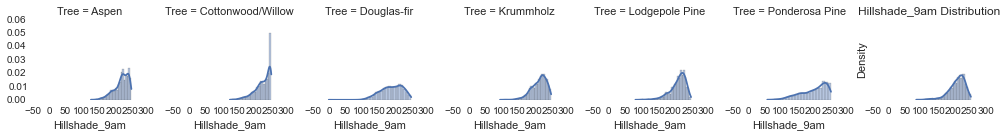

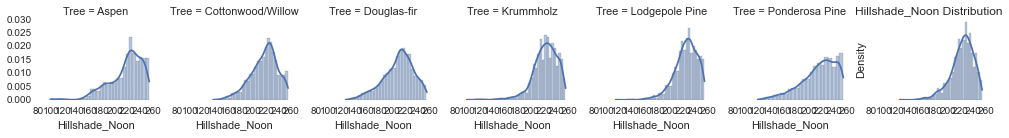

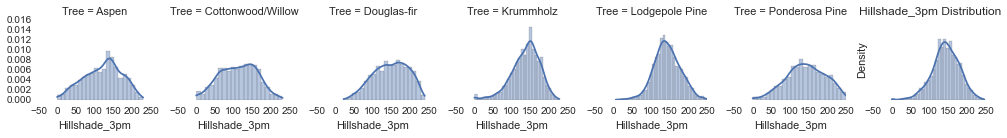

In [50]:
ordinal_columns = ['Hillshade_9am', 
                'Hillshade_Noon', 
                'Hillshade_3pm']

def ord_dist(var):
    items = sns.FacetGrid(train_data, col = 'Tree', size= 2)
    #dist_plot = (hist=False, rug=True, color ='r')
    items.map(sns.distplot, var)
    plt.title(var + " Distribution")
    plt.xlabel('')
    plt.ylabel('Density')
    plt.show();
    
for col in ordinal_columns:
    ord_dist(col)

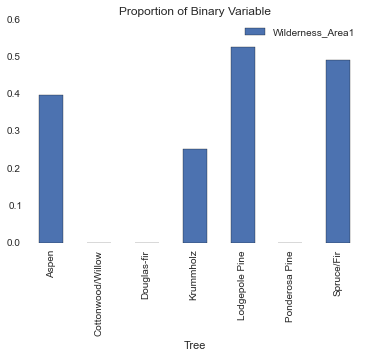

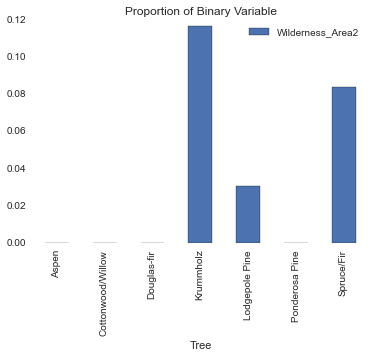

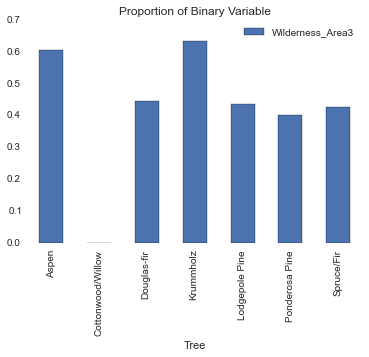

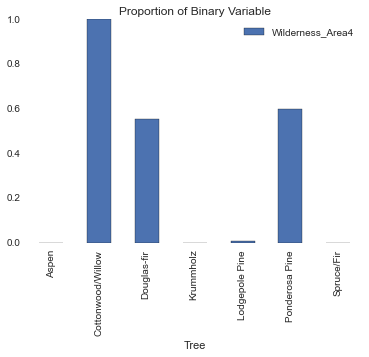

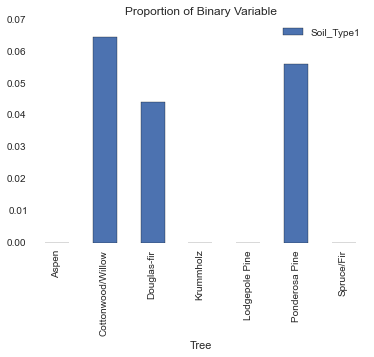

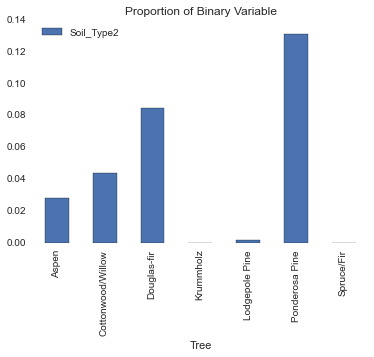

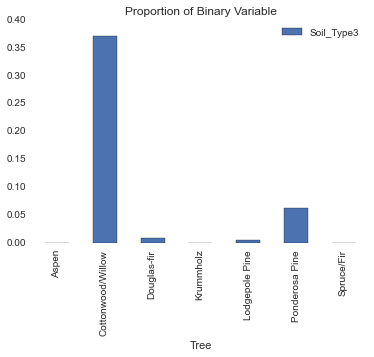

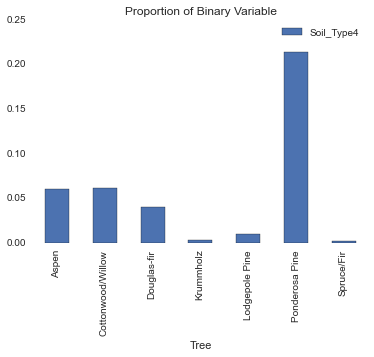

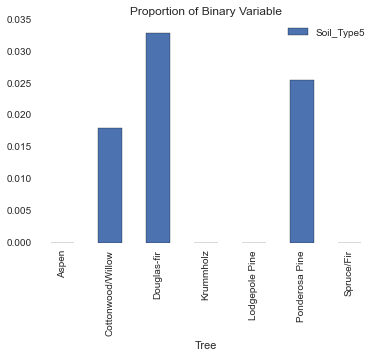

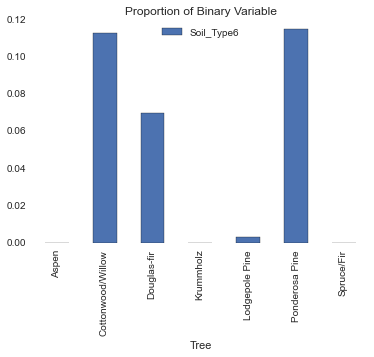

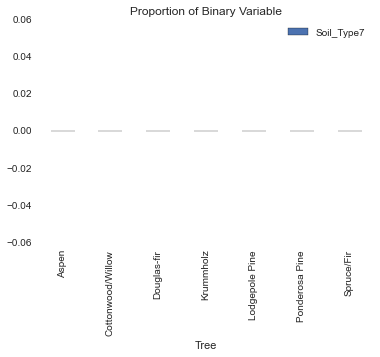

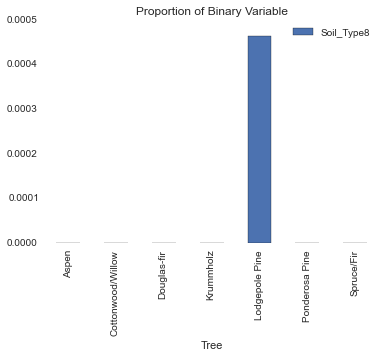

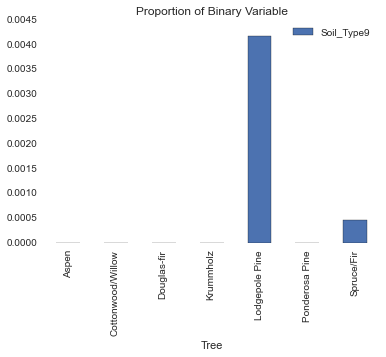

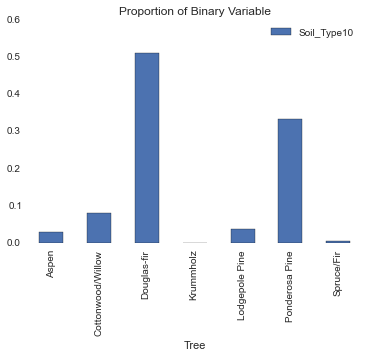

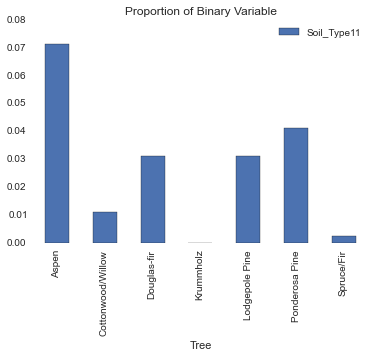

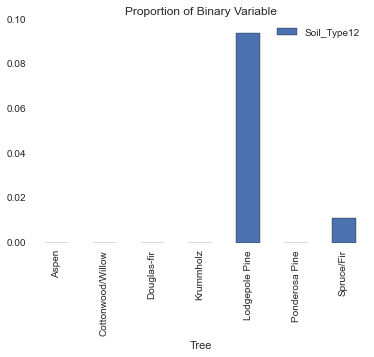

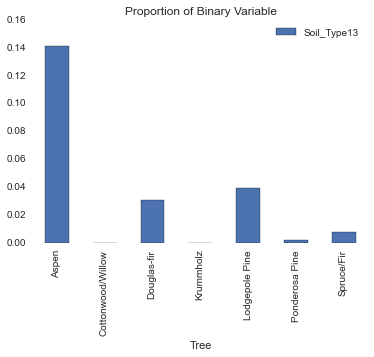

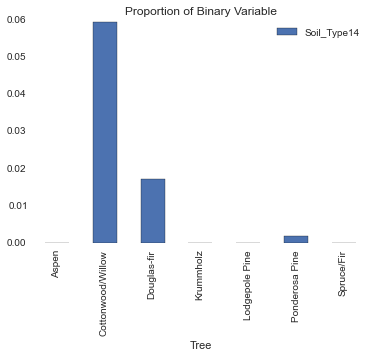

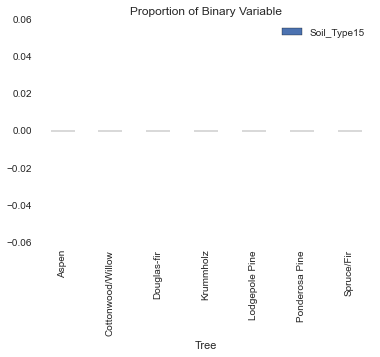

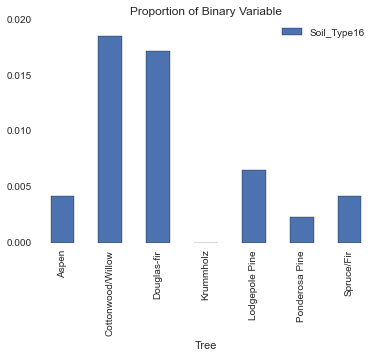

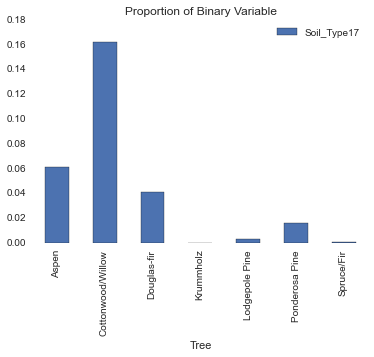

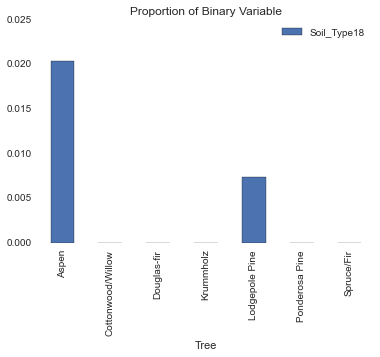

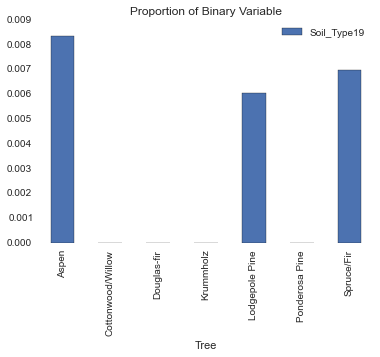

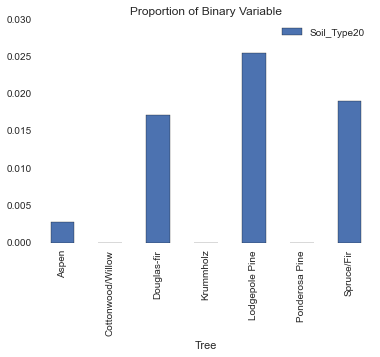

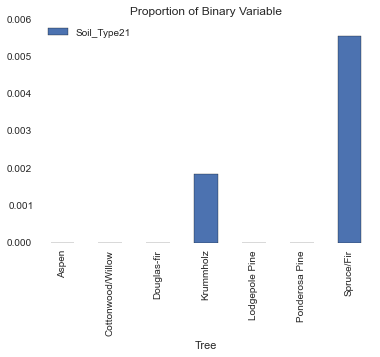

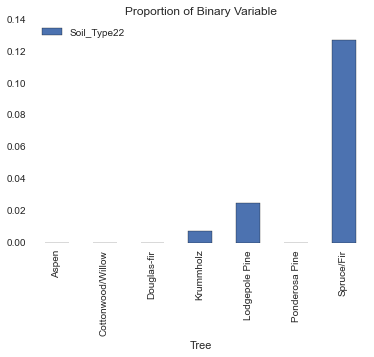

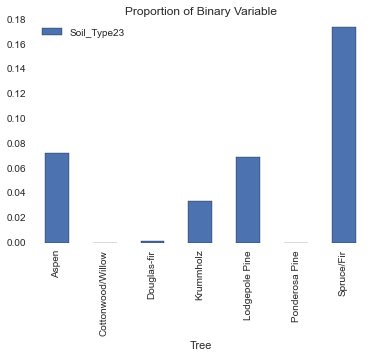

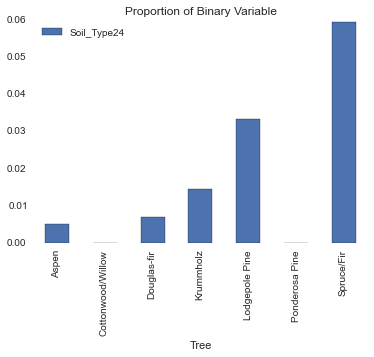

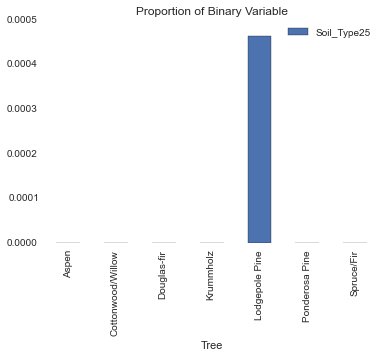

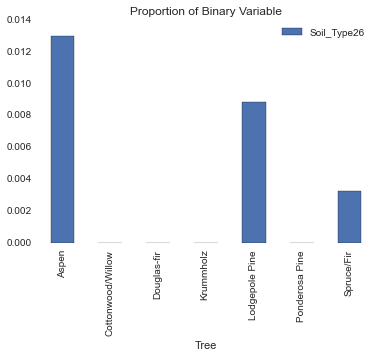

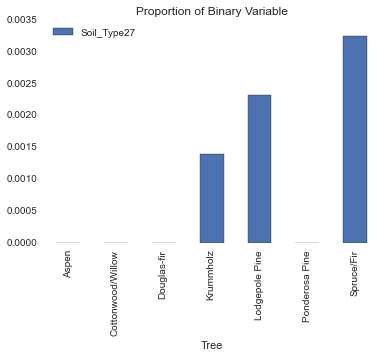

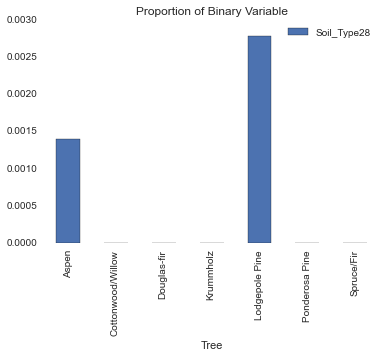

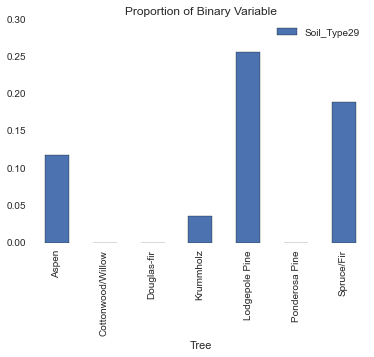

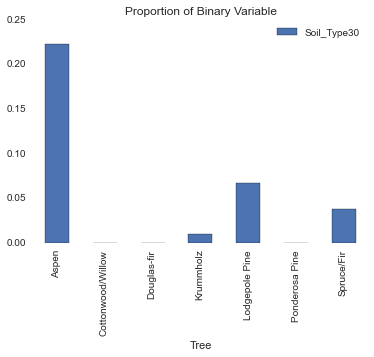

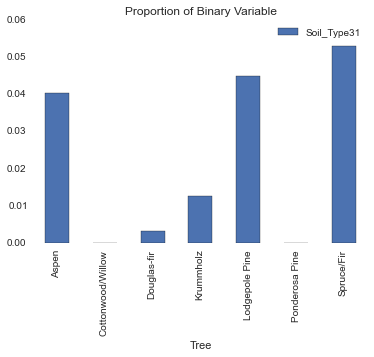

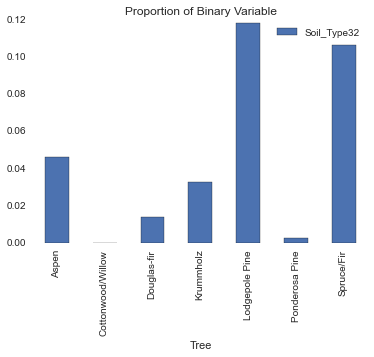

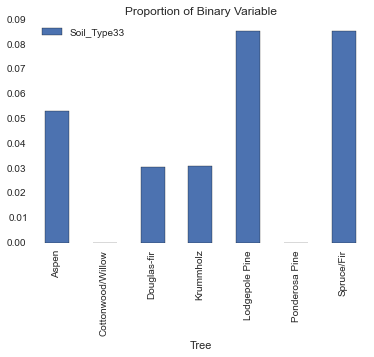

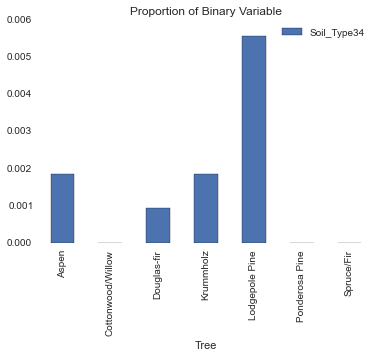

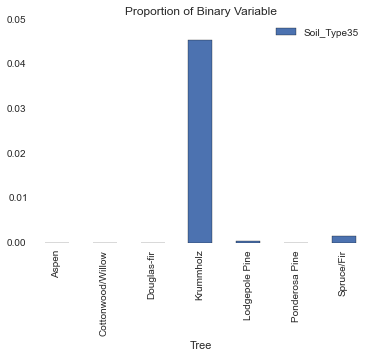

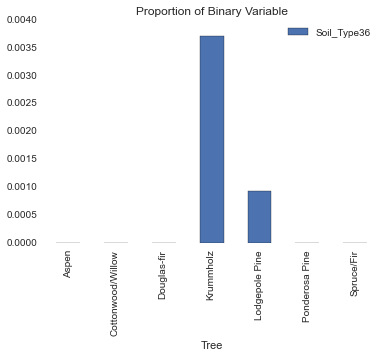

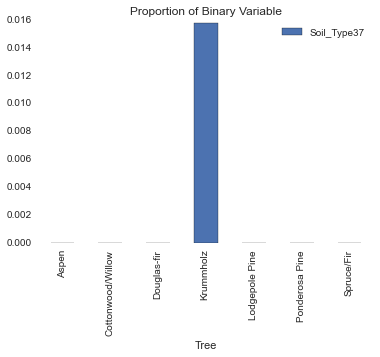

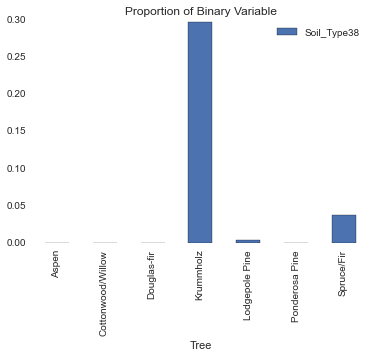

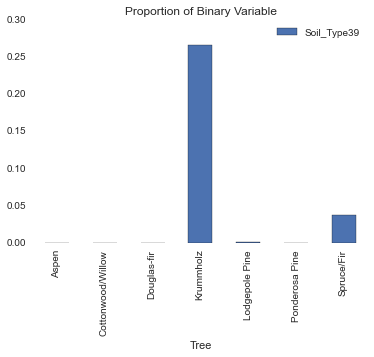

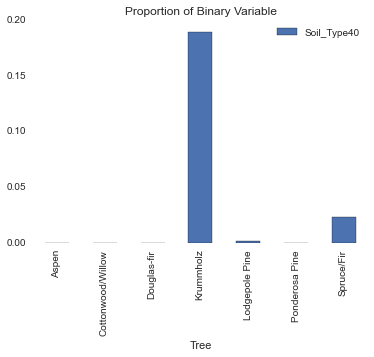

In [51]:
nonbin = contin_col + ordinal_columns + ['Tree', 'Id', 'Cover_Type']
binary_columns = [x for x in train_data.columns if x not in nonbin]

def binary_dist(var):
    gb = train_data.groupby(['Tree'])[var].mean()
    df = pd.DataFrame(gb)
    df.plot(kind='bar', title = "Proportion of Binary Variable")

for i in binary_columns:
    binary_dist(i)

In [52]:

train_filedata = np.genfromtxt('train.csv', skip_header=1, delimiter=',', dtype=int)

train_labels = train_filedata[:,train_filedata.shape[1] - 1]
train_data = train_filedata[:, 1:train_filedata.shape[1] - 1]

test_filedata = np.genfromtxt('test.csv', skip_header=1, delimiter=',', dtype=int)
test_data = test_filedata[:, 1:test_filedata.shape[1]]

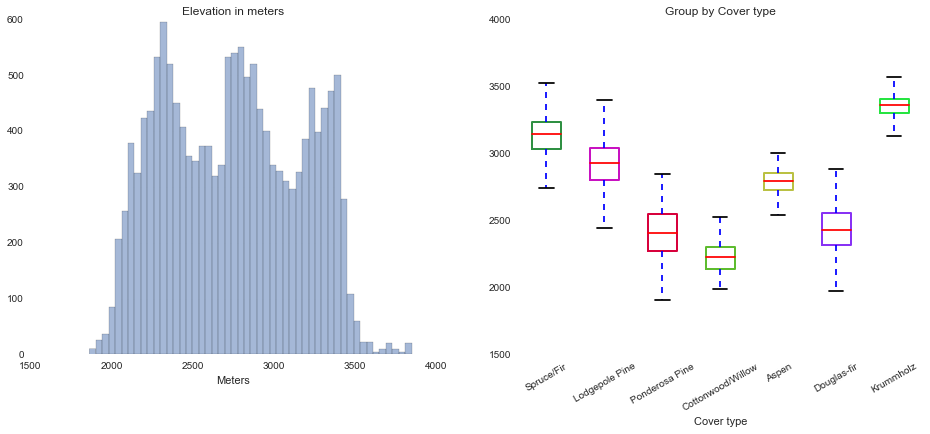

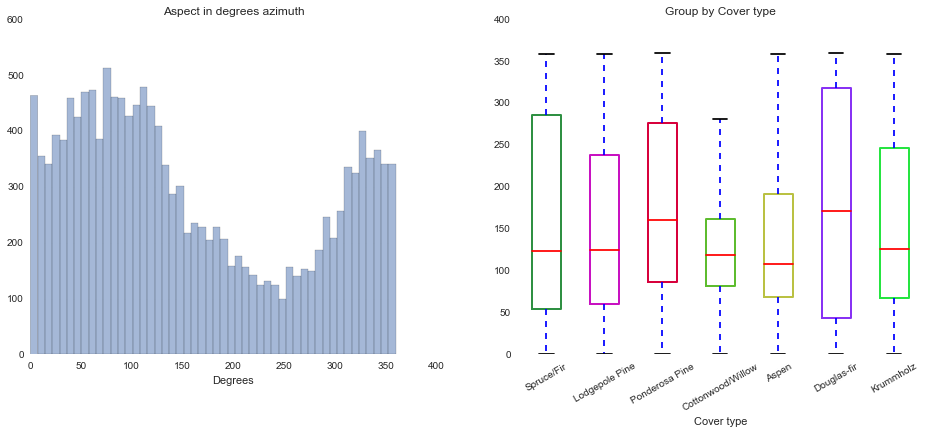

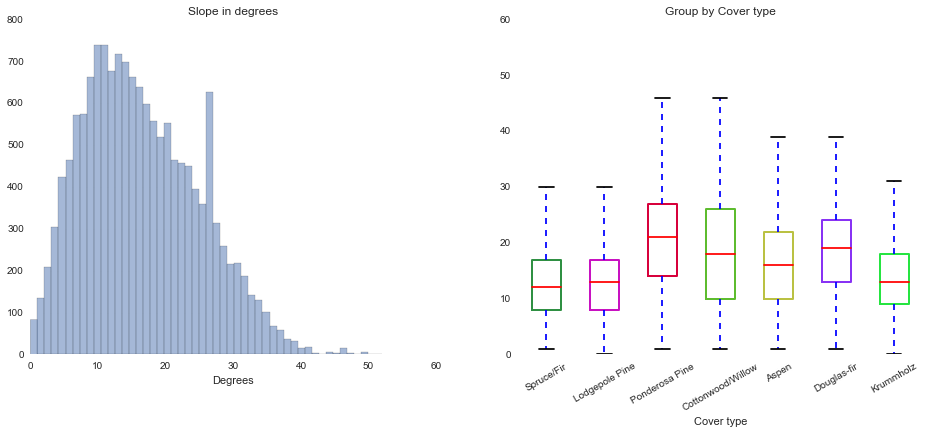

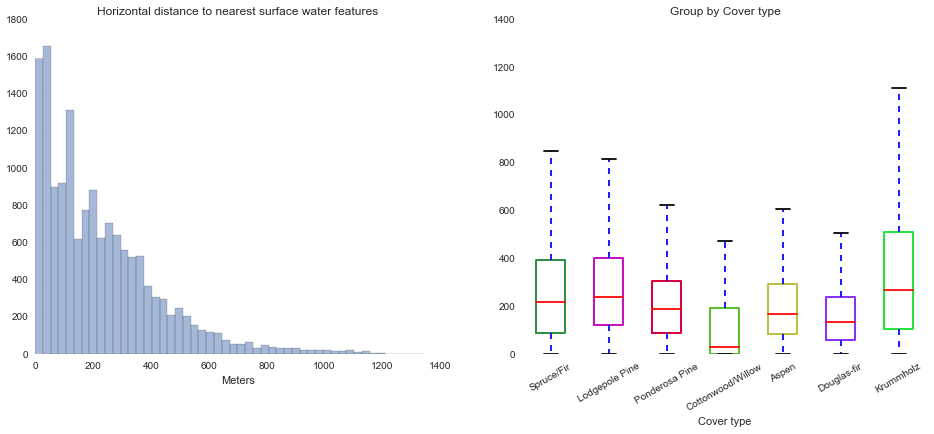

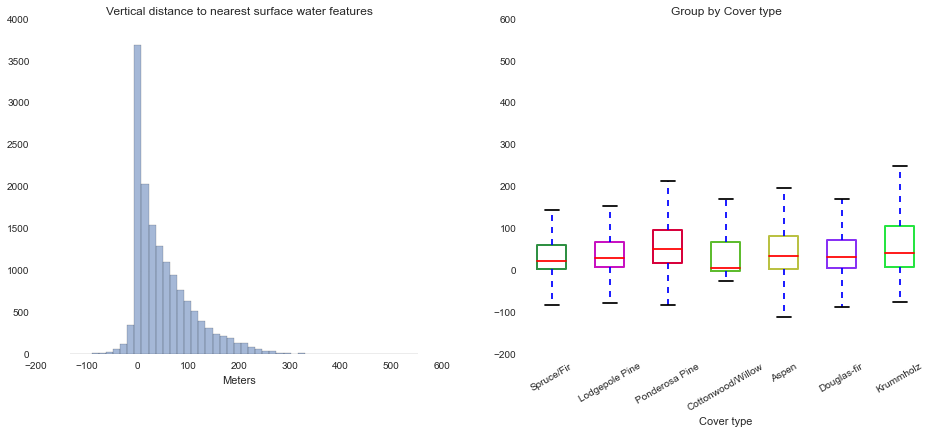

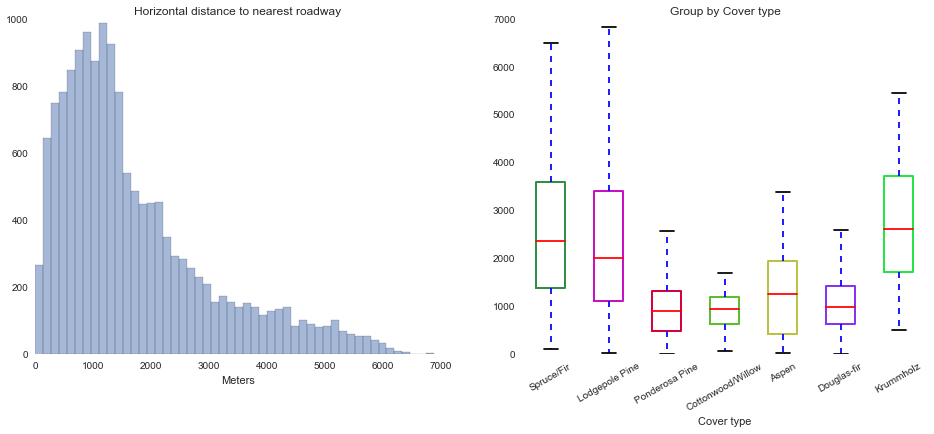

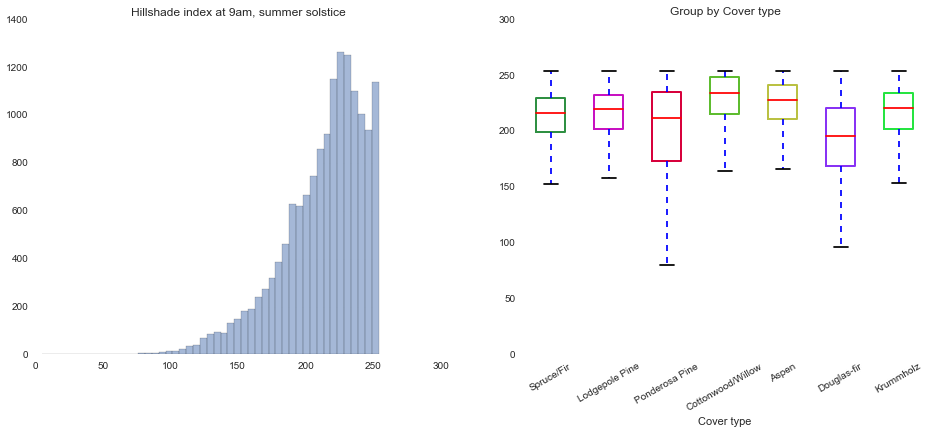

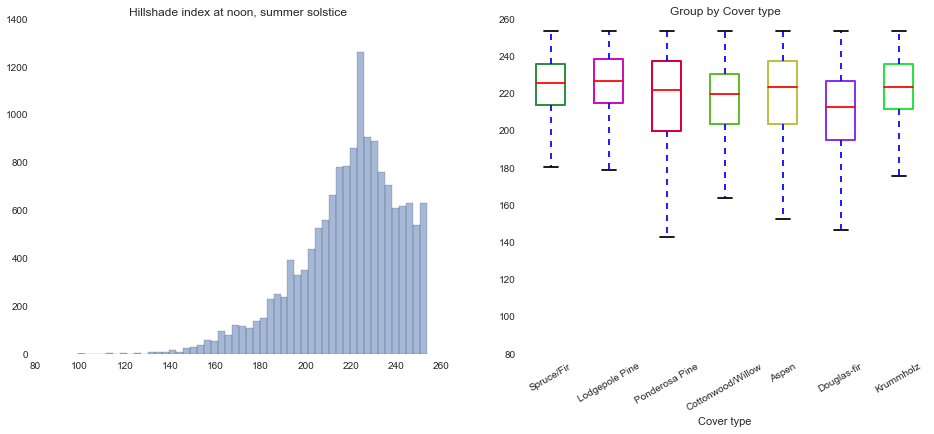

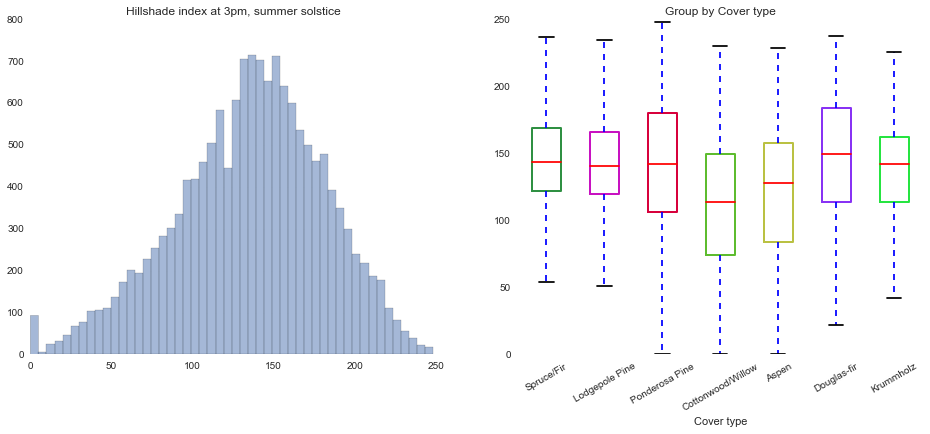

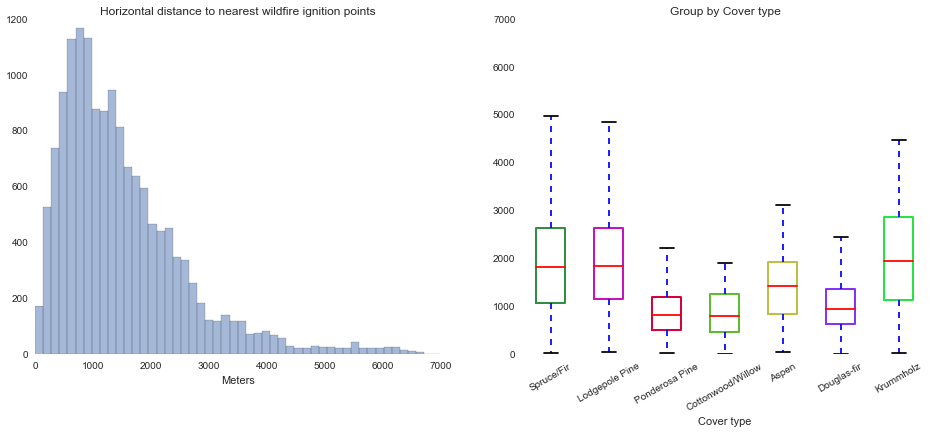

In [53]:
# Visualizing data distributions - Plotting histograms

cover_type = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
random_colors = np.random.rand(7, 3)

def plot_histogram(ax, data, title, xlab):
    ax.hist(data, bins=50, alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel(xlab)

# Aspect and Cover type
def plot_class_wise_data(ax, data, labels):
    boxplotdata = list()
    for classes in range(1, 8):
        sub_data = data[np.where(labels == classes)]
        boxplotdata.append(sub_data)

    bp = ax.boxplot(boxplotdata)
    ax.set_xlabel('Cover type')
    ax.set_title('Group by Cover type')
    ax.set_xticklabels(cover_type, rotation=30)

    for i, box in enumerate(bp['boxes']):
        box.set(color=random_colors[i,:], linewidth=2)

def plotter(data, labels, title_1, x_label_1):
    fig = plt.figure(figsize=(16, 6))
    ax1 = fig.add_subplot(1, 2, 1)
    plot_histogram(ax1, data, title_1, x_label_1)
    ax2 = fig.add_subplot(1, 2, 2)
    plot_class_wise_data(ax2, data, labels)

# Elevation
title_1 = 'Elevation in meters'
x_label_1 = 'Meters'
data = train_data[:,0]
plotter(data, train_labels, title_1, x_label_1)

# Aspect
title_1 = 'Aspect in degrees azimuth'
x_label_1 = 'Degrees'
data = train_data[:,1]
plotter(data, train_labels, title_1, x_label_1)

# Slope in degrees
title_1 = 'Slope in degrees'
x_label_1 = 'Degrees'
data = train_data[:,2]
plotter(data, train_labels, title_1, x_label_1)

# Horizontal_Distance_To_Hydrology
title_1 = 'Horizontal distance to nearest surface water features'
x_label_1 = 'Meters'
data = train_data[:,3]
plotter(data, train_labels, title_1, x_label_1)

# Vertical_Distance_To_Hydrology
title_1 = 'Vertical distance to nearest surface water features'
x_label_1 = 'Meters'
data = train_data[:,4]
plotter(data, train_labels, title_1, x_label_1)

# Horizontal_Distance_To_Roadways
title_1 = 'Horizontal distance to nearest roadway'
x_label_1 = 'Meters'
data = train_data[:,5]
plotter(data, train_labels, title_1, x_label_1)

# Hillshade_9am
title_1 = 'Hillshade index at 9am, summer solstice'
x_label_1 = ''
data = train_data[:,6]
plotter(data, train_labels, title_1, x_label_1)

# Hillshade_Noon
title_1 = 'Hillshade index at noon, summer solstice'
x_label_1 = ''
data = train_data[:,7]
plotter(data, train_labels, title_1, x_label_1)

# Hillshade_3pm
title_1 = 'Hillshade index at 3pm, summer solstice'
x_label_1 = ''
data = train_data[:,8]
plotter(data, train_labels, title_1, x_label_1)

# Horizontal_Distance_To_Fire_Points
title_1 = 'Horizontal distance to nearest wildfire ignition points'
x_label_1 = 'Meters'
data = train_data[:,9]
plotter(data, train_labels, title_1, x_label_1)

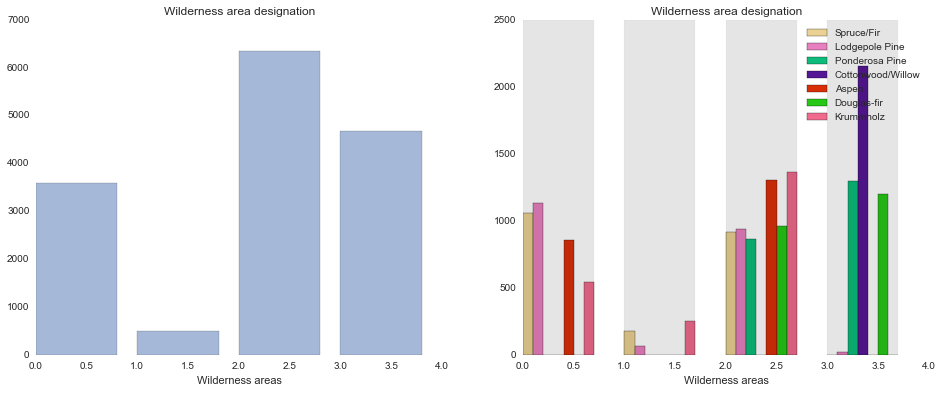

In [40]:
wilderness_area_names = ['Rawah', 'Neota', 'Comanche Peak', 'Cache la Poudre']

fig = plt.figure(figsize=(16, 6))

# Wilderness_Area
wilderness_areas = np.sum(train_data[:,10:14], axis=0)
ax = fig.add_subplot(1, 2, 1)
dummy = ax.bar(np.arange(4), wilderness_areas, alpha=0.5)
dummy = ax.set_title("Wilderness area designation")
dummy = ax.set_xlabel('Wilderness areas')
#dummy = ax.set_xticklabels(wilderness_area_names,rotation=30)

# Wilderness_Area per cover type
ax = fig.add_subplot(1, 2, 2)

ind = np.arange(4)
width = 0.1
for i in range(1, 8):
    wilderness_areas = np.sum(train_data[np.where(train_labels==i),10:14][0], axis=0)
    bar = ax.bar(ind, wilderness_areas, width=width, color=random_colors[i-1,:])
    ind = ind + width
    dummy = ax.set_title("Wilderness area designation")
    dummy = ax.set_xlabel('Wilderness areas')
    ax.legend(cover_type)
dummy = ax.set_xlim(0, 4)
bar = ax.bar(np.arange(4), [2500, 2500, 2500, 2500], width=(width*7), color='black', alpha=0.1)
#dummy = ax.set_xticklabels(wilderness_area_names,rotation=30)

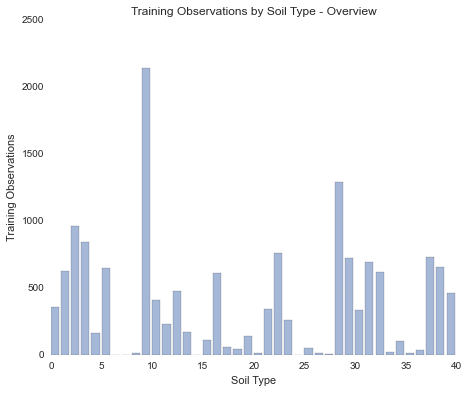

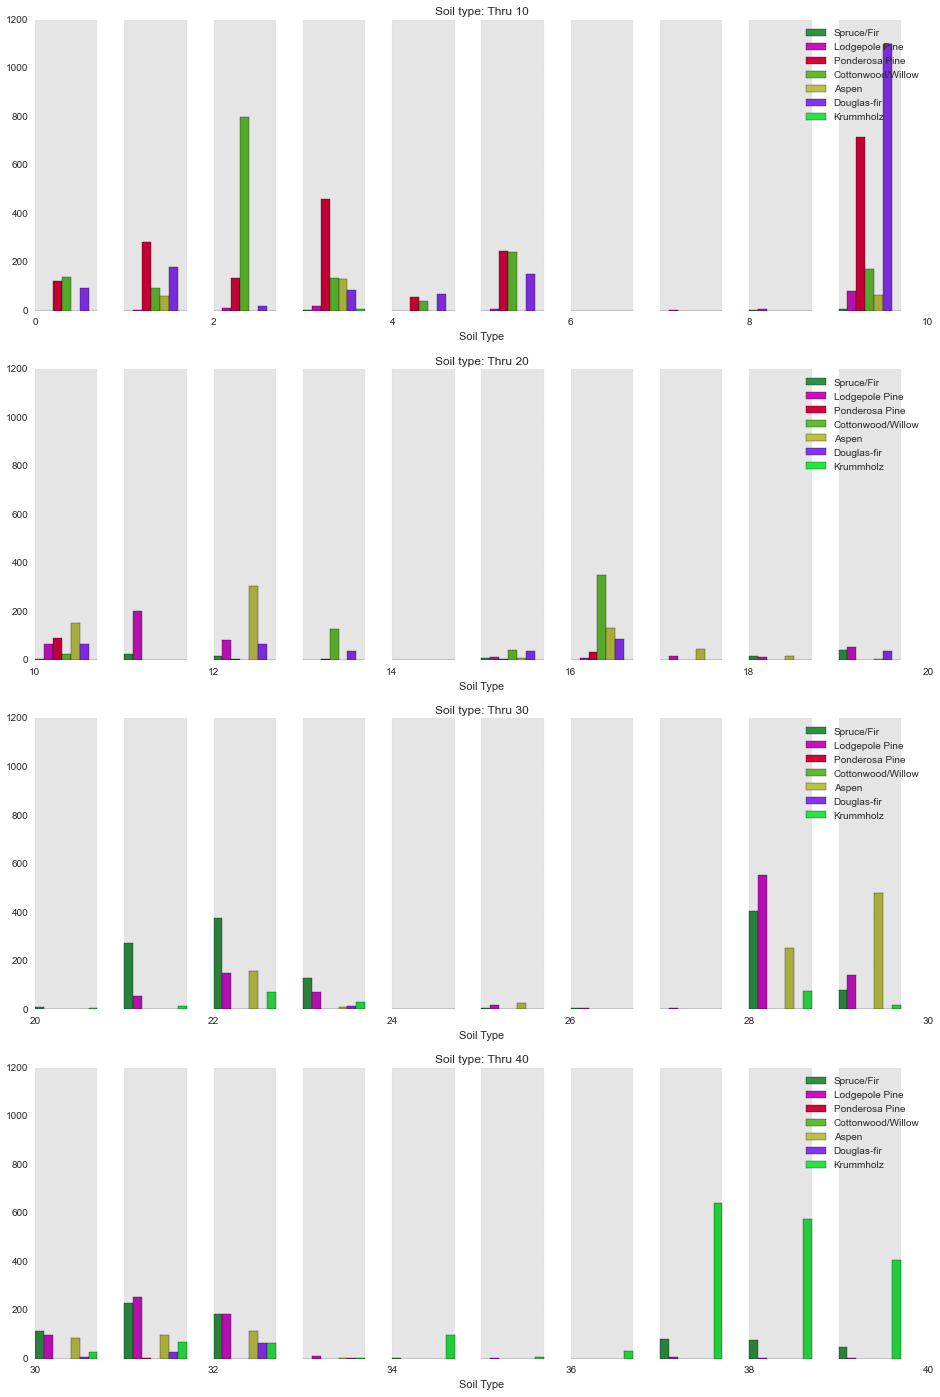

In [54]:
# Soil_Type
fig = plt.figure(figsize=(16, 6))
soil_type = np.sum(train_data[:,14:55], axis=0)
ax = fig.add_subplot(1, 2, 1)
dummy = ax.bar(np.arange(40), soil_type, alpha=0.5)
dummy = ax.set_title("Training Observations by Soil Type - Overview")
dummy = ax.set_xlabel('Soil Type')
dummy = ax.set_ylabel('Training Observations')

# Soil type per cover type
fig = plt.figure(figsize=(16, 24))

for j in range(4):
    ax = fig.add_subplot(4, 1, j+1)
    dummy = ax.set_title("Training Observations by Soil Type - Detailed")
    ind = np.arange(10*j, 10*j+10)
    width = 0.1
    for i in range(1, 8):
        soil_type = np.sum(train_data[np.where(train_labels==i),((j+1)*10)+4:((j+1)*10)+14][0], axis=0)
        bar = ax.bar(ind, soil_type, width=width, color=random_colors[i-1,:])
        ind = ind + width
        title = "Soil type: Thru " + str((j+1) * 10)
        dummy = ax.set_title(title)
        dummy = ax.set_xlabel('Soil Type')
        ax.legend(cover_type)
    bar = ax.bar(np.arange(10*j, 10*j+10), [1200]*10, width=(width*7), color='black', alpha=0.1)

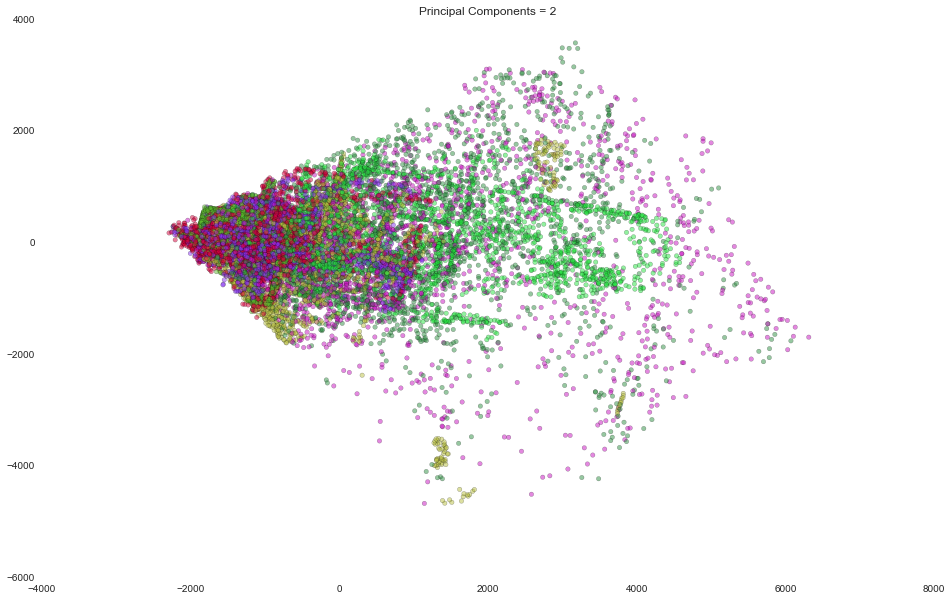

In [55]:
from sklearn.mixture import GMM
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed_data = pca.fit_transform(train_data)

colors = np.zeros((train_data.shape[0], 3))
for i in range(colors.shape[0]):
    colors[i,] = random_colors[train_labels[i]-1]

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)
dummy = ax.scatter(transformed_data[:,0], transformed_data[:,1], c=colors, alpha=0.5)
dummy = ax.set_title("Principal Components = 2")

###Section 3: Creating a Baseline Model for Kaggle

In [72]:
#Establish a baseline score in Kaggle using basic KNN model where K = 1
path = '/Users/jaredmaslin/Desktop/kaggle_forest_cover/' 

train_data = pd.read_csv(os.path.join(path,'train.csv'), header=0) 
train_labels = train_data['Cover_Type'].as_matrix() 
train_id = train_data['Id'].as_matrix() 
train_data.drop(['Cover_Type', 'Id'], axis=1, inplace=True) 
test_data = pd.read_csv(os.path.join(path,'test.csv'), header=0) 
test_id = test_data['Id'].as_matrix() 
test_data.drop(['Id'], axis=1, inplace=True) 

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_data, train_labels)
 
print 'With the oven preheated and our ingredients ready, pop it in the oven!' 
predictions = knn.predict(test_data).astype(int) 
print predictions.shape 
 
print "Just need to cut our delicious baked good into slices..." 
prediction_write = open(os.path.join(path,"sampleSubmissionKNN1.csv"), "wb") 
open_file_object = csv.writer(prediction_write) 
open_file_object.writerow(["Id","Cover_Type"]) 
open_file_object.writerows(zip(test_id, predictions)) 
prediction_write.close() 

With the oven preheated and our ingredients ready, pop it in the oven!
(565892,)
Just need to cut our delicious baked good into slices...


###Section 4: Run baseline models for comparison
To do this, we will need to create a development (validation) set out of the training data provided...

In [94]:
#First, let's reload our data and split the training set into training and development (validation)
#This splitting will allow for us to test several classifiers at a high level before selecting the most insightful classifier for further definition
train_data = pd.read_csv(os.path.join(path,'train.csv'), header=0) 
train_labels = train_data['Cover_Type'].as_matrix() 
train_id = train_data['Id'].as_matrix() 
train_data.drop(['Cover_Type', 'Id'], axis=1, inplace=True) 
test_data = pd.read_csv(os.path.join(path,'test.csv'), header=0) 
test_id = test_data['Id'].as_matrix() 
test_data.drop(['Id'], axis=1, inplace=True) 

In [129]:
from sklearn.cross_validation import train_test_split

X = np.array(train_data)
Y = np.array(train_labels)

shuffle = np.random.permutation(np.arange(X.shape[0]))
X,Y = X[shuffle],Y[shuffle]

train_data, dev_data, train_labels, dev_labels = train_test_split(X, Y, test_size=0.1, random_state=0)

In [136]:
#Baseline K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)
print 'K-Nearest Neighbors yields an accuracy of %s' % (knn.score(dev_data, dev_labels)*100)

#Baseline Linear Regression
lr = LinearRegression() #initialize a logistic regression model
lr.fit(train_data, train_labels)
print '\nLinear Regression yields an accuracy of %s' % (lr.score(dev_data, dev_labels)*100)

#Baseline Logistic Regression
lm = LogisticRegression() #initialize a logistic regression model
lm.fit(train_data, train_labels)
print '\nLogistic Regression yields an accuracy of %s' % (lm.score(dev_data, dev_labels)*100)

#Baseline Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(train_data, train_labels)
print '\nGaussian Naive Bayes yields an accuracy of %s' % (gnb.score(dev_data, dev_labels)*100)

#Baseline Random Forest
rf = RandomForestClassifier()
rf.fit(train_data, train_labels)
print '\nRandom Forest yields an accuracy of %s' % (rf.score(dev_data, dev_labels)*100)

#Baseline "ExtraTrees"
et = ExtraTreesClassifier()
et.fit(train_data, train_labels)
print '\nExtra Trees yields an accuracy of %s' % (et.score(dev_data, dev_labels)*100)

K-Nearest Neighbors yields an accuracy of 80.0816326531

Linear Regression yields an accuracy of 39.7602656886

Logistic Regression yields an accuracy of 64.5714285714

Gaussian Naive Bayes yields an accuracy of 47.7551020408

Random Forest yields an accuracy of 84.2448979592

Extra Trees yields an accuracy of 83.1020408163


One surprise that pops out is the relative accuracy for KNN model (where K = 1) with respect to regressions and Naive Bayes. That said, both Random Forest and Extra Trees produce slightly superior results. 

With this initial validation complete, we will move forward with further developing a model based on the Extra Trees classifier.

In [135]:
#Establish a new baseline with Kaggle using the basic Extra Trees Classifier
et = ExtraTreesClassifier()
et.fit(train_data, train_labels)

predictions = et.predict(test_data).astype(int) 
print predictions.shape 
 
prediction_write = open(os.path.join(path,"sampleSubmissionET1.csv"), "wb") 
open_file_object = csv.writer(prediction_write) 
open_file_object.writerow(["Id","Cover_Type"]) 
open_file_object.writerows(zip(test_id, predictions)) 
prediction_write.close() 

(565892,)


This new baseline (using the Extra Trees classifier) yields a Kaggle score of ######## (leaderboard rank = ###)

###Section 5: Feature Engineering and Parameter/Model Tuning